In [ ]:
import matplotlib.pyplot as plt
from matplotlib import markers
import numpy as np
import random
import math
import scipy
from math import cos
from scipy import constants
from scipy.stats import skew
from scipy.stats import kurtosis
from numpy import random
import networkx as nx
from networkx.drawing.layout import spring_layout
from pandas import *
from IPython.core.pylabtools import figsize

In [ ]:
class user:
    def __init__(self, user_id, self_opinion, neighbours_opinion) :
        self.user_id = user_id
        self.self_opinion = self_opinion
        self.neighbours_opinion = neighbours_opinion

#transmission function  

def transmission_condition_for_x_is_less_than_or_equal_to_1(x):
        return cos(x*constants.pi/2)*cos(x*constants.pi/2)

def transmission_function(x):
    if(x<=1):
        ptx=transmission_condition_for_x_is_less_than_or_equal_to_1(x)
        return ptx
    else:
        return 0

# post distribution function

def distribution_function(x,o) :
        pdx = cos(x/2*constants.pi/2 + o) * cos(x/2*constants.pi/2 + o)
        return pdx

# attraction probability function 

def attraction_prob_function(n) :
    return 1 - n/2

#rewiring function 

def rewiring_condition_for_x_is_greater_than_1(x):
        return cos(x*constants.pi/2)*cos(x*constants.pi/2)

def rewire(x):
    if(x>1):
      return rewiring_condition_for_x_is_greater_than_1(x)
        
    else:
      return 0

# function for accepting valid opinion

def accept_valid_opinion (n):
    if (n<=-1) :
        return -1
    elif (n>=1) :
        return 1
    else : return n    

In [ ]:
data = read_csv("Agnipath_cleanData_twitter.csv")
 
# converting column data to list
opl = data['Polarity'].tolist()
 
# printing list data
print('OPINION LIST:', opl)

no_of_users = len(opl)

print("Initially total number of nodes: ", no_of_users)

G = nx.gaussian_random_partition_graph(no_of_users, 1000, 40, 0.02, 0.00005)

iteration = 1000

initial_adjacency_mat = nx.to_numpy_matrix(G)

objlist = []

id = 0

for i in G :  #iterating in the graph containing nodes   
    bi = opl[id] #initializing each nodes with a real opinion value
    #converting matrix to list by flatten function 
    arr = np.asarray(initial_adjacency_mat[id])
    node_connection = arr.flatten()
    id = id + 1
    objlist.append(user(id,bi,node_connection))

OPINION LIST: [-1.0, 0.3, 0.1666666666666666, 0.7, 0.7, 0.0, 0.7, -0.0638888888888888, 0.0, 0.0, 0.0, 0.7, 0.0, -0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.071875, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.2083333333333333, 1.0, 0.125, 0.0, 0.7, 0.125, 1.0, 0.7, 0.125, 0.125, 0.0, 0.1666666666666666, 0.1625, 0.0, 0.0, 0.0, 0.1666666666666666, 0.0, 0.0, 0.071875, 1.0, 0.0, 0.7, 0.7, 0.0666666666666666, 0.0, 0.0, 1.0, 0.0, 0.1666666666666666, 0.7, 0.7, 0.0, 0.7, 0.7, 0.7, 0.7, 0.0, 0.7, 0.1666666666666666, 0.7, 0.7, 0.0, 0.7, 0.1666666666666666, 0.7, 0.0, 0.0, 0.7, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.7, 0.0, 0.7, 0.7, 0.3, 0.0, 0.0, 0.071875, 0.7, 0.1666666666666666, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.7, 0.7, 0.1666666666666666, 0.7, 0.7, 0.7, 0.0, 0.0, 0.7, 0.0, 0.0, 0.0, 0.0, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 0.0, 0.0, 0.7, 0.0, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.0, 0.0, 0.0, 0.071875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

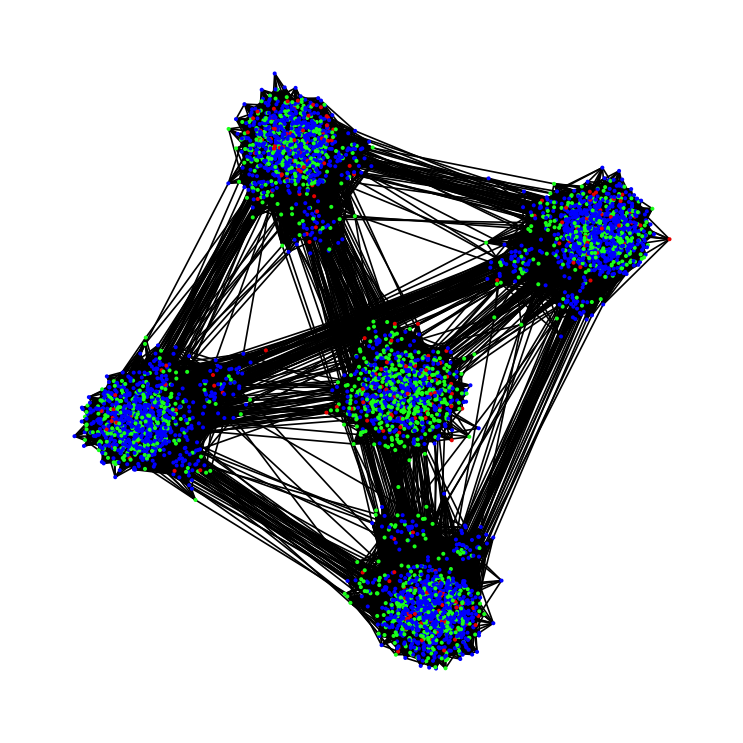

In [ ]:
color_map1 = []
for i in G :
    if(objlist[i].self_opinion < 0):
      node_color = '#e60000'
      color_map1.append(node_color)
    elif(objlist[i].self_opinion > 0):
      node_color = '#1aff1a'
      color_map1.append(node_color)
    else: 
      node_color= 'blue'
      color_map1.append(node_color)
fig = plt.figure(1 , figsize=(6,6) , dpi=120)
nx.draw_spring (G , node_color = color_map1 , edge_color = 'black' , node_size = 2 ) # drawing the graph

In [ ]:
# spamming logic
spammer_list = []
n = G.number_of_nodes ()
n1 = n
y = int(n/100)

for i in range (y) :
            spam_node = random.randint(1,n)
            spammer_list.append(spam_node)
            length = len(spammer_list)

print("\nThe spamming nodes are: " , spammer_list)

for i in range(iteration) :

    if (i % 100 == 0) :

        for j in spammer_list :
            fake_id1 = n1+1
            fake_id2 = n1+2
            fake_id3 = n1+3
            fake_id4 = n1+4
            fake_id5 = n1+5
            fake_id6 = n1+6

            G.add_node(fake_id1)
            G.add_edge( j , fake_id1 )
            G.add_node(fake_id2)
            G.add_edge( j, fake_id2 )
            G.add_node( fake_id3 )
            G.add_edge( fake_id1 , fake_id3 )
            G.add_node( fake_id4 )
            G.add_edge( fake_id1 , fake_id4 )
            G.add_node( fake_id5 )
            G.add_edge( fake_id2 , fake_id5 )
            G.add_node( fake_id6 )
            G.add_edge( fake_id2 , fake_id6 ) 
            n1 = G.number_of_nodes()

print("\nnumber of generated spammers : " , length)
print("\nnumber of nodes before spamming :" , n)
print("\nnumber of nodes after spamming :" , n1)

updated_adjacency_mat = nx.to_numpy_matrix(G)

for i in range(n):  # iterating in the graph containing 4039 nodes + fake nodes
    # converting matrix to list by flatten function 
    new_arr = np.asarray(updated_adjacency_mat[i])
    new_node_connection = new_arr.flatten()
    objlist[i-1].neighbours_opinion = new_node_connection

j=0
for i in range (n,n1,6):
    new_arr = np.asarray(updated_adjacency_mat[i])
    new_node_connection = new_arr.flatten()
    if(j>length-1):
        j=0
    objlist.append(user(i+1,objlist [(spammer_list[j])-1].self_opinion,new_node_connection))
    objlist.append(user(i+2,objlist[(spammer_list[j])-1].self_opinion,new_node_connection))
    objlist.append(user(i+3,objlist[(spammer_list[j])-1].self_opinion,new_node_connection))
    objlist.append(user(i+4,objlist[(spammer_list[j])-1].self_opinion,new_node_connection))
    objlist.append(user(i+5,objlist[(spammer_list[j])-1].self_opinion,new_node_connection))
    objlist.append(user(i+6,objlist[(spammer_list[j])-1].self_opinion,new_node_connection))
    j=j+1



The spamming nodes are:  [1279, 1697, 2658, 4668, 513, 261, 4422, 936, 2696, 1914, 150, 656, 2592, 4161, 3818, 2719, 1128, 4439, 3343, 3860, 3429, 4194, 610, 751, 4281, 1987, 1779, 2798, 2575, 2258, 711, 148, 3459, 1712, 1684, 3584, 3440, 4103, 2636, 871, 4107, 4355, 3959, 2520, 3855, 1447, 4301]

number of generated spammers :  47

number of nodes before spamming : 4771

number of nodes after spamming : 7591


In [ ]:
l1 = [] # list consisting of x values (difference between the post's and selected individual's opinion)
l2 = [] # list consisting of pt(x) values
l3 = [] # list consisting of x values (difference between the individual's and its neigbour's opinion)
l4 = [] # list consisting of pd(x) values
l5 = [] # list consisting of x values (difference between the neigbour's and individual's opinion)
l6 = [] # list consisting of prew(x) values

phi = 0 # real no. controlling the starting point of the cosine squared function
delta= 0.1 # delta is a real no. which becomes positive if  θ > bj and becomes negative if  θ < bj

for i in range(iteration) : # n times iteration to get a promising plot
    
    selected_node_value = random.randint( 1 , 4771)

    print("The selected node: ", objlist[selected_node_value - 1].user_id)
    print("The opinion of the selected node: ", objlist[selected_node_value - 1].self_opinion)
    print("The connection of the selected node to its adjacent nodes is given by : ", objlist[selected_node_value - 1].neighbours_opinion)

    listbj = [] #list containing the id of the neighbouring nodes of the selected node
    
    k=0  # counter for increamenting the index 
    for x in objlist[selected_node_value - 1].neighbours_opinion :
        if(x==1) :
            #print("The opinions of the neigbouring nodes are bj :", objlist[k].self_opinion) 
            listbj.append(objlist[k].user_id)
        k = k + 1
    
    #print("list containing the id of the neighbouring nodes of the selected node: ",listbj)

    theta = random.uniform (-1 , 1) # --> post opinion
    m = round(abs(theta - objlist[selected_node_value - 1].self_opinion) , 4 )
    print("The value of the main diff is :", m)
    l1.append(m)
    t = transmission_function(m)
    l2.append(t)
    print("The result of the transmission function for the selected node:", t)

    if (m <= 1) :  # condition to check if the post is transmitted or not
        for i in listbj : 
            #print("The initial i values are :", objlist[i-1].self_opinion)
            n = abs(objlist[selected_node_value - 1].self_opinion - objlist[i-1].self_opinion)
            l3.append(n)
            d = distribution_function( n , phi)
            l4.append(d)
            
            if (d >= 0.1) : # condition to check if the post is distributed or not 
                
                p1 = round(abs(theta - objlist[i-1].self_opinion),4)
                att = attraction_prob_function(p1)
                print("The result of the attraction prob func is :", att)
                
                if (p1 <= 1) : # condition to check if the particular neighbour is attracted or repulsed
                    objlist[i-1].self_opinion = objlist[i-1].self_opinion + delta # increamenting the opinion by delta value (0.1) 
                    '''for k in range(len(objlist[selected_node_value - 1].neighbours_opinion)) :
                        if(k == i-1):
                            objlist[selected_node_value - 1].neighbours_opinion[k] == 1.0'''

                else :
                    objlist[i-1].self_opinion = objlist[i-1].self_opinion - delta # decreamenting the opinion by delta value (0.1)
                    '''q = abs(objlist[i-1].self_opinion - objlist[selected_node_value - 1].self_opinion)
                    l5.append(q)
                    r = rewire(q)
                    l6.append(r)
                    for k in range(len(objlist[selected_node_value - 1].neighbours_opinion)) :
                        if(k == i-1):
                            objlist[selected_node_value - 1].neighbours_opinion[k] == 0.0'''

Streaming output truncated to the last 5000 lines.
The result of the attraction prob func is : 0.6289
The result of the attraction prob func is : 0.7789
The result of the attraction prob func is : 0.8289
The result of the attraction prob func is : 0.8789
The result of the attraction prob func is : 0.8289
The result of the attraction prob func is : 0.8789
The result of the attraction prob func is : 0.5789
The result of the attraction prob func is : 0.7289
The result of the attraction prob func is : 0.7789
The selected node:  3603
The opinion of the selected node:  0.475
The connection of the selected node to its adjacent nodes is given by :  [0. 0. 0. ... 0. 0. 0.]
The value of the main diff is : 0.6502
The result of the transmission function for the selected node: 0.2727248770006402
The result of the attraction prob func is : 0.5624
The result of the attraction prob func is : 0.7624
The result of the attraction prob func is : 0.8624
The result of the attraction prob func is : 0.8624
Th

The pt(x),pd(x),prew(x) vs x plotted graph is given below :






'plt.xlabel(" x ----> ")\nplt.ylabel("pt(x), pd(x),prew(x) ---->")\nplt.scatter(l5 , l6, label=\'prew(x) vs x\')\nplt.legend()\nplt.show()'

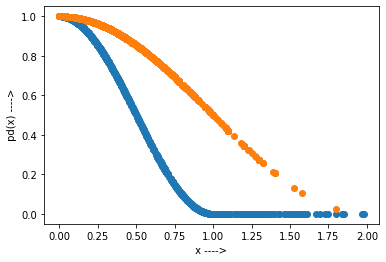

In [ ]:
print("The pt(x),pd(x),prew(x) vs x plotted graph is given below :")

plt.xlabel(" x ----> ")
plt.ylabel(" pt(x) ---->")
plt.scatter(l1 , l2, label='pt(x) vs x')
print("\n")

plt.xlabel(" x ----> ")
plt.ylabel(" pd(x) ---->")
plt.scatter(l3 , l4, label='pd(x) vs x')
print("\n")

'''plt.xlabel(" x ----> ")
plt.ylabel("pt(x), pd(x),prew(x) ---->")
plt.scatter(l5 , l6, label='prew(x) vs x')
plt.legend()
plt.show()'''

The density map of the above analysis is given below : 



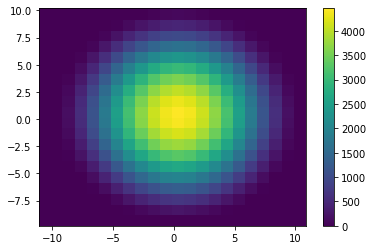

In [ ]:
final_self_opinion_list = []
final_nei_avg_opinion_list = []

for i in range(4771) :
    final_self_opinion_list.append(objlist[i].self_opinion)
    c = 0
    k = 0
    summ = 0
    for j in objlist[i].neighbours_opinion:
        if(j==1) :
            c=c+1
            summ = summ + objlist[k].self_opinion
        k=k+1   
    avg = summ/c
    final_nei_avg_opinion_list.append(avg)

#DEFINE GRID SIZE AND RADIUS(h)

grid_size = 1
h = 10

#GETTING X,Y MIN AND MAX
x_min = min(final_self_opinion_list)
x_max = max(final_self_opinion_list)
y_min = min(final_nei_avg_opinion_list)
y_max = max(final_nei_avg_opinion_list)

#CONSTRUCT GRID
x_grid = np.arange(x_min-h,x_max+h,grid_size)
y_grid = np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh = np.meshgrid(x_grid,y_grid)

#GRID CENTER POINT
xc = x_mesh+(grid_size/2)
yc = y_mesh+(grid_size/2)

#FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

#processing
intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(final_self_opinion_list)):

            #Calculating DISTANCE

            d=math.sqrt((xc[j][k]-final_self_opinion_list[i])**2+(yc[j][k]-final_nei_avg_opinion_list[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
         # All intensity values
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

print("The density map of the above analysis is given below : \n")
# Density mapping plots     
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity)
#plt.plot(final_self_opinion_list,final_nei_avg_opinion_list,'ro')
plt.colorbar()
plt.show()

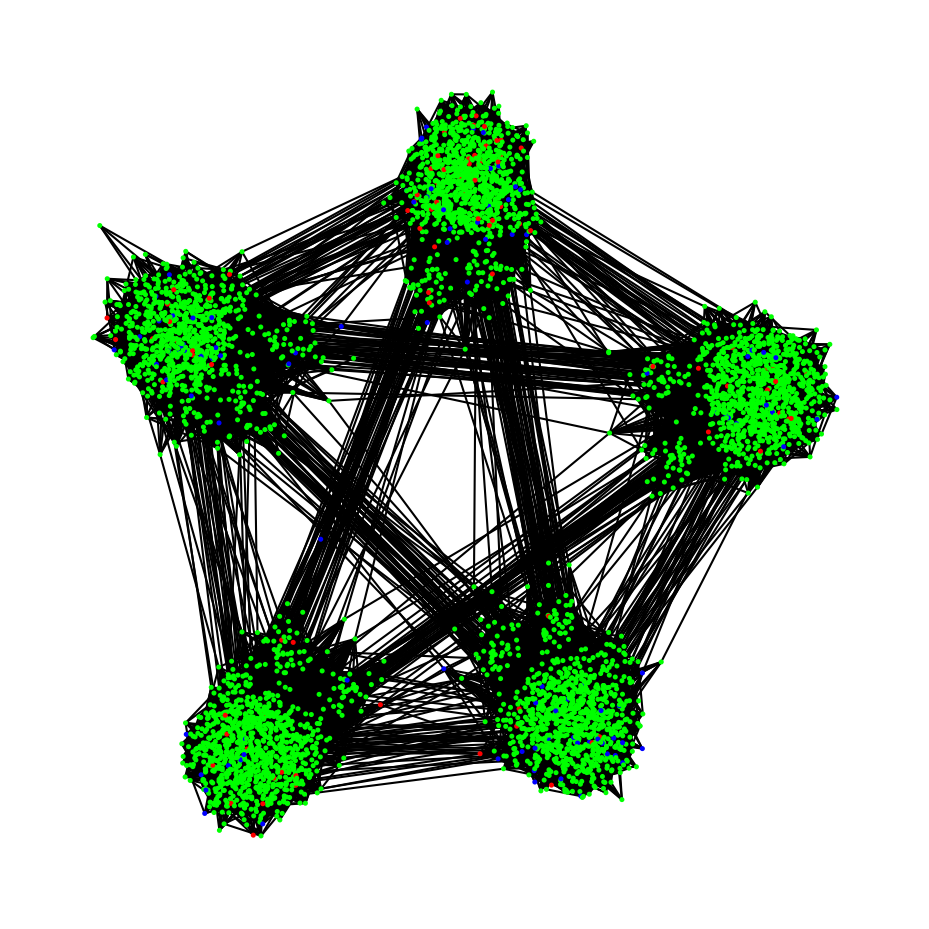

In [ ]:
color_map = []
for i in G :
  if (i > 4771) :
    node_color = '#ff8c1a'
    color_map.append(node_color)
  else :
    if(objlist[i].self_opinion < 0):
      node_color = '#ff0000'
      color_map.append(node_color)
    elif(objlist[i].self_opinion > 0):
      node_color = '#00ff00'
      color_map.append(node_color)
    else: 
      node_color= 'blue'
      color_map.append(node_color)
fig = plt.figure(1 , figsize=(6,6) , dpi=150)
nx.draw_spring (G , node_color = color_map , edge_color = 'black' , node_size = 2 ) # drawing the graph